<a href="https://colab.research.google.com/github/ahmadfauze/tugas-datamining-/blob/main/klasifikasifision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
# TensorFlow versi 2.x sekarang aktif!
# mulai menggunakan TensorFlow di notebook Colab ini.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow tf.keras
import tensorflow as tf
from tensorflow import keras

# Menampilkan versi sensorflow dengan cara !!

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Import dataset Fashion MNIST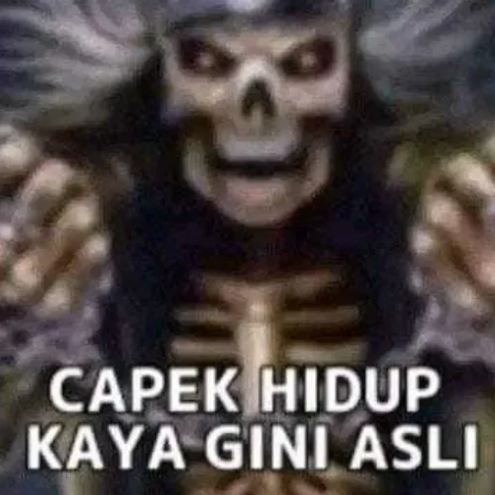

Panduan ini menggunakan dataset  [ Fashion MNIST ] yang memiliki 70,000 gambar hitam putih dalam 10 kategori pakaian. Tiap gambar menunjukan gambar dari satu tipe pakaian dalam resolusi rendah (28 x 28 pixel) seperti berikut:


<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Gambar 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Sampel gambar dari dataset Fashion-MNIST</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Dataset Fashion MNIST dibuat untuk menggantikan dataset [MNIST](http://yann.lecun.com/exdb/mnist/) Data set fashion MNIST DIBUAT UNTUK MENGGANTIKAN DATA SET SEBELUMNYA
Yang seringkali dijadikan sebagai hello world dari pemrograman mesin learning untuk komputer vision.
Data set MNIST terdiri atas gambar angka tulisan tangan 0,1 , 2 dalam format yang di identik dengan gambar pakaian yang akan digunakan dalam data set fashion yang saya gunakan dari MNIST.

Panduan ini menggunakan fashion dari data set MNIST agar lebih bervariasi, data ini juga sedikit lebih menantang dibanding dengan MNIST biasa kedua data set berukuran kecil dan biasa digunakan untuk melakukan verifikasi sebuah algoritma bekerja sesuai dengan yang diinginkan. Kedua data ini merupakan titik awal yang bagus untuk melakukan tes dan debug terhadap kode. Apa itu debug bang?

Jadi ada 6000 gambar digunakan sebagai data train dari mode neural network dan 10.000 gambar digunakan untuk mengevaluasi seberapa berat sih model dapat mengklasifikasi gambar. Oke Oke saya akan mengakses data fashion di atas langsung dari transflow. Dengan cara import muat data dari fashion di atas langsung dari transflow.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


# Klasifikasi Dasar: Klasifikasi gambar pakaian

Panduan ini bertujuan untuk membangun sebuah model neural network yang dapat mengklasifikasikan gambar pakaian, seperti sneaker dan baju. Tidak masalah apabila saat ini Anda belum memahami seluruh detail yang ada; Ini merupakan ringkasan singkat dari sebuah program Tensorflow lengkap dengan penjelasan detail dari setiap langkah-langkahnya.

Panduan ini menggunakan tf.keras, sebuah API tingkat tinggi untuk membangun dan melakukan training model di TensorFlow.



**Dataset** yang telah di muat akan mengembalikan empat nilai NumPy arrays:

* Array `train_images` dan `train_labels` merupakan data yang digunakan oleh model untuk mempelajari *pattern*
* Model diuji menggunakan *test set*, yaitu array `test_images`, dan `test_labels`.

Tiap gambar merupakan array berukuran 28x28, dengan nilai yang berkisar antara 0 sampai dengan **255**. Label dari data merupakan array bertipe bilangan integer, yang memiliki rentang nilai dari 0 sampai dengan 9. Nilai ini memiliki korespondensi dengan kelas pakaian sebagai berikut:


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>sepatu</td>
  </tr>
    <tr>
    <td>8</td>
    <td>tas</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



setiap gambar memiliki satu label sajahhhh. Nmaun kelas tidak tersedia dalam dataset. saya akan menyimpan data kelaznya di sini. ini akan berguan ketika saya akan melakukan plotting dari gambar:
APA ITU PLOTIING BANG???????


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'sepatu', 'tas', 'Ankle boot']

## Markicob Eksplorasi Data
Saya akan lakukan explorasii dari format data set sebelumnya. saya akan mengunakan data trsebut untuk membangun atau membuat model. Kode berikut menunjukan bahwa terdapat 60,000 gambar di dalam terening set, setiap gambar didalam terening set, setiap gambar berukuran 28 x 288 pixel



In [11]:
train_images.shape
# Selain terdapat 60,000 gambar, terdapat juga 60,000 label di dalam training set:

(60000, 28, 28)

In [14]:
len(train_labels)

# Setaiap label adalah bilangan int 1 sampai dengan 9:

60000

In [15]:
train_labels
# ada 10,000 gambar di dalam test set. Gambar ini juga di persentasiakan atau di tampilkan sebagai 28 x 28 pixel:



array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
test_images.shape
# ada 10.000 gamabar dan label mencakup 10.000 itu

(10000, 28, 28)


## Melakukan preprocessing terhadap data

Jadi semua data yang saya punya harus diolah terlebih dahulu sebelum digunakan untuk membangun model neural network. Jadi seandainya kalau kita mengamati gambar pertama dalam training set, kita nih pasti melihat gitu atau bisa menebak bahwa nilai pixel dari gambar yang ditampilkan itu rentangnya kira-kira 0 sampai dengan 255:

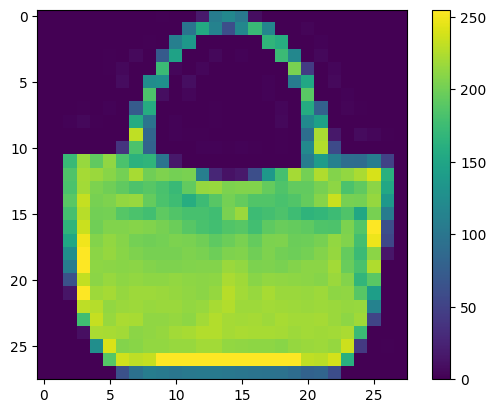

In [30]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

Nilai pixel ini akan saya ubah menjadi rentang nol sampai dengan 1 sebelumnya menggunakan sebagai input dari model neuron network untuk melakukan hal tersebut, nilai tersebut harus dibagi dengan 255. Jadi perlu kita perhatiin nih bawa training set dan testing itu harus diolah dengan cara yang sam:

In [33]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Jadi untuk memastikan bahwa data dalam format yang benar dan siap untuk membangun dan melatih model neuron network saya akan menampilkan 25 gambar pertama dari training set yang nantinya saya akan tampilkan nama kelas di bawah dari tiap-tiap gambarnya

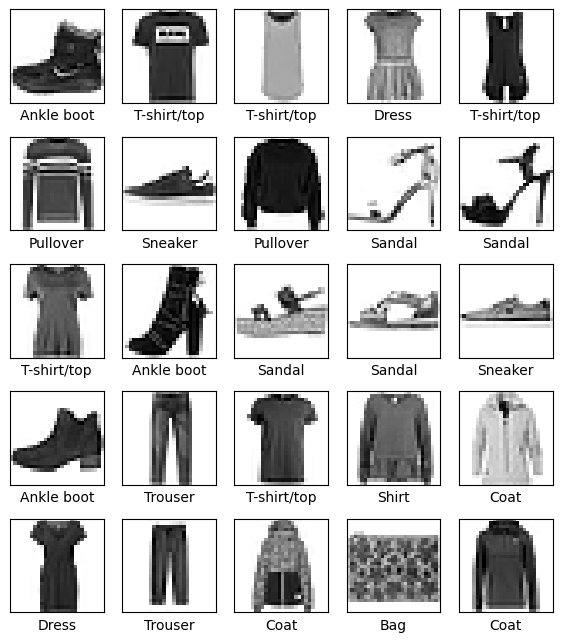

In [56]:
plt.figure(figsize=(7,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Membangun model

Untuk dapat membuat sebuah model neural network, perlu dilakukan konfigurasi layer untuk model tersebut, sehingga proses kompilasi pada model dapat dilakukan.